In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [129]:
import warnings
warnings.filterwarnings('ignore')

In [130]:
cars_data = pd.read_csv('data/car-data.csv')

In [219]:
cars_data1 = pd.read_csv('data/car-data.csv')
cars_data1.sample(5)

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11445,2019,19500,Manual,14679,Diesel,145,47.9,2.0
3337,2019,34450,Automatic,5000,Petrol,145,36.2,2.0
8951,2019,15490,Manual,5938,Petrol,145,52.3,1.0
14981,2019,28000,Semi-Auto,10074,Diesel,145,32.8,2.0
12408,2018,8412,Manual,6261,Petrol,145,64.2,1.0


In [211]:
cars_data.sample()

,price,mileage,tax,mpg,engineSize,number_of_years,transmission_Automatic,transmission_Manual,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
3383,13950,72861,145,47.1,2.0,6,0,1,0,0,1


In [132]:
cars_data.dtypes

year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [133]:
cars_data.shape

(15157, 8)

In [134]:
cars_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


In [135]:
cars_data.isnull().sum()

year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

<AxesSubplot:>

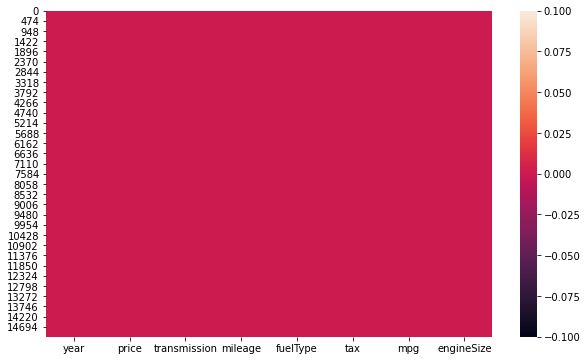

In [136]:
plt.figure(figsize = (10,6))
sns.heatmap(cars_data.isnull())

In [137]:
cars_data['number_of_years'] = pd.datetime.now().year - cars_data['year']

In [138]:
cars_data.drop('year', axis = 1, inplace = True)

In [139]:
cars_data.sample(5)

,price,transmission,mileage,fuelType,tax,mpg,engineSize,number_of_years
8781,13690,Manual,6000,Petrol,145,48.7,1.0,2
4040,23895,Semi-Auto,12938,Petrol,200,39.8,2.0,5
11218,26490,Semi-Auto,19851,Petrol,150,38.2,2.0,3
13454,37944,Semi-Auto,8,Diesel,145,32.8,2.0,2
11579,9999,Automatic,58425,Diesel,200,47.7,2.0,8


In [140]:
cat_columns = [key for key in dict(cars_data.dtypes)
             if dict(cars_data.dtypes)[key] in ['object'] ]
cat_columns

['transmission', 'fuelType']

In [141]:
# cars_data[cat_columns].sample(5)

In [142]:
for column in cars_data[cat_columns].columns:
    print(cars_data[cat_columns][column].value_counts())

Manual       9417
Semi-Auto    3780
Automatic    1960
Name: transmission, dtype: int64
Petrol    8553
Diesel    6372
Hybrid     145
Other       87
Name: fuelType, dtype: int64


In [143]:
cars_data = pd.get_dummies(cars_data)
cars_data.head()

,price,mileage,tax,mpg,engineSize,number_of_years,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,25000,13904,145,49.6,2.0,2,1,0,0,1,0,0,0
1,26883,4562,145,49.6,2.0,2,1,0,0,1,0,0,0
2,20000,7414,145,50.4,2.0,2,0,1,0,1,0,0,0
3,33492,4825,145,32.5,2.0,2,1,0,0,0,0,0,1
4,22900,6500,150,39.8,1.5,2,0,0,1,0,0,0,1


In [144]:
cars_data.drop(['transmission_Semi-Auto', 'fuelType_Other'], axis = 1, inplace = True)

In [145]:
cars_data.head()

,price,mileage,tax,mpg,engineSize,number_of_years,transmission_Automatic,transmission_Manual,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,25000,13904,145,49.6,2.0,2,1,0,1,0,0
1,26883,4562,145,49.6,2.0,2,1,0,1,0,0
2,20000,7414,145,50.4,2.0,2,0,1,1,0,0
3,33492,4825,145,32.5,2.0,2,1,0,0,0,1
4,22900,6500,150,39.8,1.5,2,0,0,0,0,1


In [146]:
cars_data.corr()

,price,mileage,tax,mpg,engineSize,number_of_years,transmission_Automatic,transmission_Manual,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
price,1.000000,-0.517599,0.482964,-0.496844,0.575139,-0.614748,0.285781,-0.516948,0.217749,0.096566,-0.242342
mileage,-0.517599,1.000000,-0.330231,0.328949,0.110513,0.762574,-0.058252,0.161377,0.221970,-0.005767,-0.216018
tax,0.482964,-0.330231,1.000000,-0.518440,0.291077,-0.365796,0.183601,-0.267064,0.007019,0.000182,-0.010473
mpg,-0.496844,0.328949,-0.518440,1.000000,-0.277009,0.297173,-0.147382,0.263480,0.100404,0.469737,-0.194543
engineSize,0.575139,0.110513,0.291077,-0.277009,1.000000,-0.004957,0.254272,-0.418441,0.656122,-0.039786,-0.646242
number_of_years,-0.614748,0.762574,-0.365796,0.297173,-0.004957,1.000000,-0.072180,0.197946,0.065031,-0.041899,-0.051410
transmission_Automatic,0.285781,-0.058252,0.183601,-0.147382,0.254272,-0.072180,1.000000,-0.493618,0.092817,0.057063,-0.123726
transmission_Manual,-0.516948,0.161377,-0.267064,0.263480,-0.418441,0.197946,-0.493618,1.000000,-0.142706,-0.125882,0.175021
fuelType_Diesel,0.217749,0.221970,0.007019,0.100404,0.656122,0.065031,0.092817,-0.142706,1.000000,-0.083701,-0.969221
fuelType_Hybrid,0.096566,-0.005767,0.000182,0.469737,-0.039786,-0.041899,0.057063,-0.125882,-0.083701,1.000000,-0.111846


<AxesSubplot:>

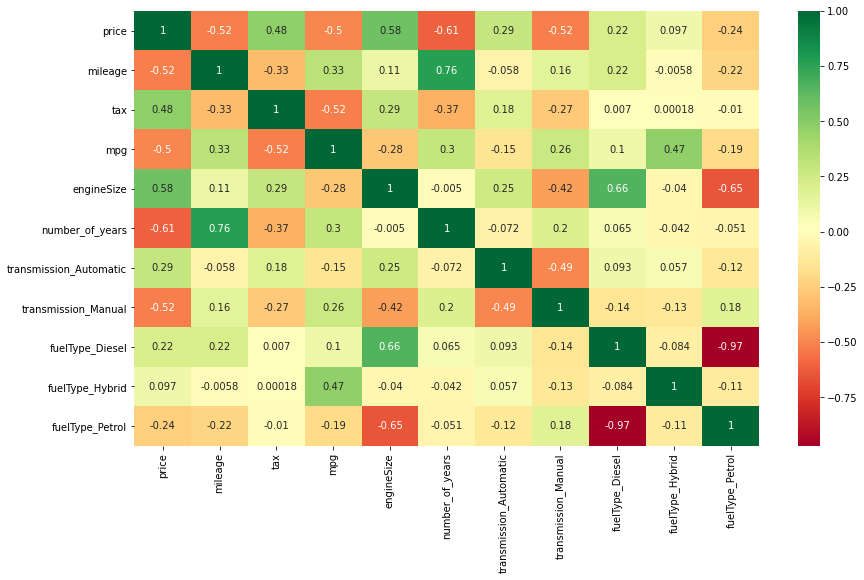

In [147]:
plt.figure(figsize = (14,8))
sns.heatmap(cars_data.corr(), annot = True, cmap="RdYlGn")

In [148]:
X = cars_data.drop('price', axis = 1)

In [149]:
y = cars_data['price']

In [22]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [23]:
print(model.feature_importances_)

[0.10915205 0.0805324  0.20471114 0.14148351 0.19101318 0.22822784
 0.0033035  0.013702   0.00393474 0.02393964]


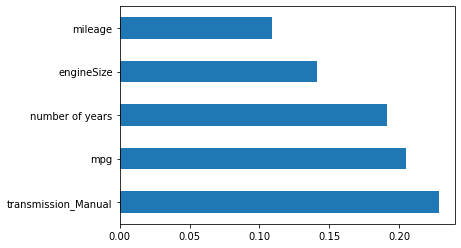

In [24]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [151]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

In [ ]:
rf_random.best_params_

In [ ]:
rf_random.best_score_

In [ ]:
predictions=rf_random.predict(X_test)

In [ ]:
print('The R-square is: ', rf_random.score(X_test, y_test))

In [152]:
regressor=RandomForestRegressor()

In [153]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [154]:
predictions = regressor.predict(X_test)

In [155]:
print('The R-square is: ', regressor.score(X_train, y_train))

The R-square is:  0.9908252583647177


In [156]:
print('The R-square is: ', regressor.score(X_test, y_test))

The R-square is:  0.9363877571377697


In [116]:
cars_data.sample(5)

,price,mileage,tax,mpg,engineSize,number_of_years,transmission_Automatic,transmission_Manual,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
5987,10413,47873,20,68.9,1.6,6,0,1,1,0,0
4779,18600,26630,145,57.7,2.0,4,1,0,1,0,0
6325,32990,300,145,33.2,2.0,1,1,0,0,0,1
1667,12998,12459,150,54.3,1.4,4,0,1,0,0,1
10481,15280,29803,145,53.3,2.0,5,0,1,1,0,0


In [208]:
number_of_years = 1
transmission_Manual = 0
transmission_Automatic = 1
fuelType_Diesel = 0
fuelType_Hybrid = 0
fuelType_Petrol = 1
mileage = 300
tax = 145
mpg = 33.2
engineSize = 2.0

In [209]:
new_data = [[mileage, tax, mpg, engineSize, number_of_years, transmission_Automatic, transmission_Manual, fuelType_Diesel, fuelType_Hybrid, fuelType_Petrol]]

In [210]:
regressor.predict(new_data)

array([33338.66])

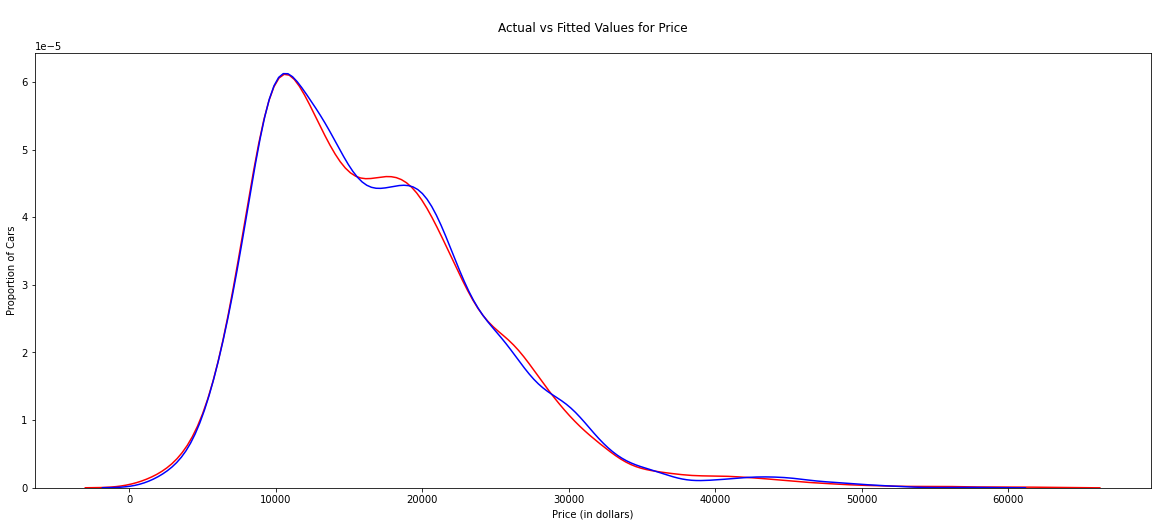

In [121]:
plt.figure(figsize=(20,8))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('\nActual vs Fitted Values for Price\n')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [34]:
import pickle 
with open('Car Price Predicton RF.pkl', 'wb') as f:
    pickle.dump(regressor, f)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
multi_lr = LinearRegression()
multi_lr.fit(X_train,y_train)
predictions1 = multi_lr.predict(X_test)

In [ ]:
print('The R-square is: ', multi_lr.score(X_test, y_test))

In [ ]:
plt.figure(figsize=(20,8))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predictions1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('\nActual vs Fitted Values for Price\n')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()